# Hyperparameter analysis

Here we provide an initial exploratory analysis of the impact of the hyperparameters of the three best performing models (Random Forests, K Nearest Neighbours and Elastic Net) on the results

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats

In [3]:
clean = pd.read_csv('data/runs/clean.csv')

# Odds Ratio

Here we develop a number of methods to study the overrepresentation of certain characteristics on a top quantile of the configurations used

These methods should be used when a pair of characteristics is being analyzed

In [4]:
def OR(indices, rest, top, group):
    li = []
    for i in indices:
        model_t = top[(top[group[0]]==i[0])&(top[group[1]]==i[1])].shape[0]
        nmodel_t = top[(top[group[0]]!=i[0])|(top[group[1]]!=i[1])].shape[0]
        model_r = rest[(rest[group[0]]==i[0])&(rest[group[1]]==i[1])].shape[0]
        nmodel_r = rest[(rest[group[0]]!=i[0])|(rest[group[1]]!=i[1])].shape[0]
        if model_r > 0 and nmodel_r > 0:
            li.append((model_t/model_r)/(nmodel_t/nmodel_r))
        else:
            li.append(0)
    return li

In [5]:
def top_OR(data, group, q=0.95, score='r2_score'):
    top = data[data[score] >= data[score].quantile(q)]
    counts = data[group +[score]].groupby(group).count()
    topcounts = top[group +[score]].groupby(group).count()
    topcounts['OR'] = OR(topcounts.index, data[data[score]<data[score].quantile(q)], top, group)
    return topcounts

These methods should be used when a single characteristic is being analyzed

In [6]:
def ORone(indices, rest, top, group):
    li = []
    for i in indices:
        model_t = top[(top[group[0]]==i)].shape[0]
        nmodel_t = top[(top[group[0]]!=i)].shape[0]
        model_r = rest[(rest[group[0]]==i)].shape[0]
        nmodel_r = rest[(rest[group[0]]!=i)].shape[0]
        if model_r > 0 and nmodel_r > 0:
            li.append((model_t/model_r)/(nmodel_t/nmodel_r))
        else:
            li.append(0)
    return li

In [7]:
def one_OR(data, group, q=0.95, score='r2_score'):
    top = data[data[score] >= data[score].quantile(q)]
    counts = data[group +[score]].groupby(group).count()
    topcounts = top[group +[score]].groupby(group).count()
    topcounts['OR'] = ORone(topcounts.index, data[data[score]<data[score].quantile(q)], top, group)
    return topcounts

# Hyper parameters

Here some initial exploration of the hyper parameters of the models is performed 

## KNN

In [8]:
knn = clean[clean['model']=='KNeighborsRegressor'][['Drug', 'fs', 'da','ajive', 'catn', 'n_neighbors', 'weights', 'algorithm', 'p','r2_score', 'r2']]

In [9]:
knn.head()

,Drug,fs,da,ajive,catn,n_neighbors,weights,algorithm,p,r2_score,r2
207,AZD6482,Lasso,none,NaN,low,29.0,uniform,ball_tree,1.0,0.416520,0.236597
208,AZD7762,Lasso,none,NaN,low,13.0,distance,ball_tree,1.0,0.377099,0.109259
209,BMS-754807,Lasso,none,NaN,low,20.0,distance,ball_tree,2.0,0.112876,0.033824
210,Dasatinib,Lasso,none,NaN,low,14.0,distance,ball_tree,1.0,0.427305,0.157184
211,Docetaxel,Lasso,none,NaN,low,24.0,distance,kd_tree,1.0,0.107432,-0.010444


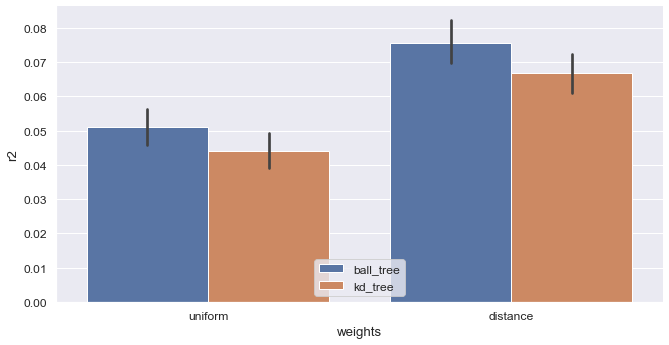

In [10]:
sns.set(font_scale=1.1)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='weights', y='r2', hue='algorithm', data=knn[knn['n_neighbors']>5], kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

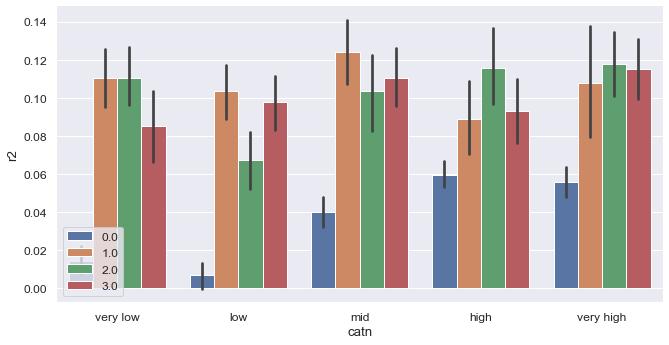

In [11]:
knn['ajive'] = knn['ajive'].fillna(0)
sns.set(font_scale=1.1)
order= ['very low', 'low', 'mid', 'high', 'very high']

g = sns.catplot(x='catn', y='r2',order=order, hue='ajive', data=knn, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower left')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

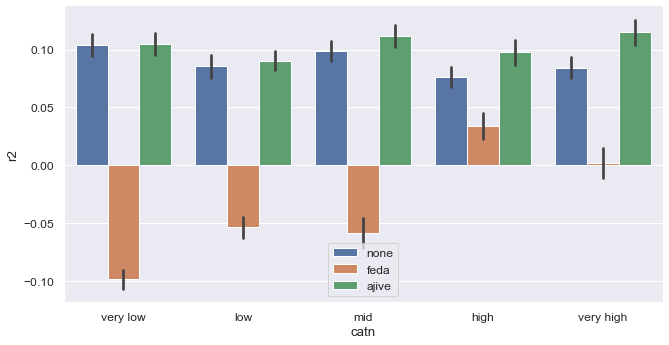

In [12]:
sns.set(font_scale=1.1)
order= ['very low', 'low', 'mid', 'high', 'very high']
g = sns.catplot(x='catn', y='r2',hue='da', data=knn,order=order, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

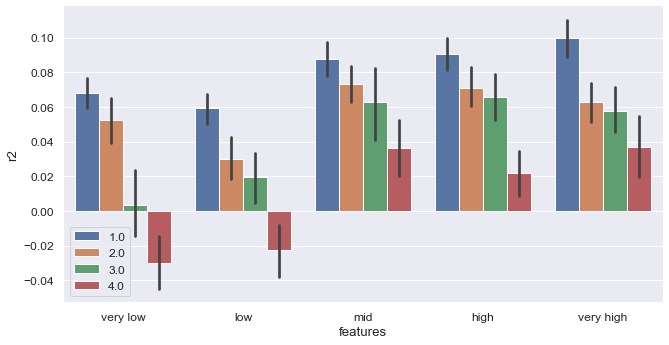

In [13]:
sns.set(font_scale=1.1)
order= ['very low', 'low', 'mid', 'high', 'very high']
g = sns.catplot(x='catn', y='r2', hue='p', data=knn,order=order, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower left')
plt.tight_layout()
g.set(xlabel='features')
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

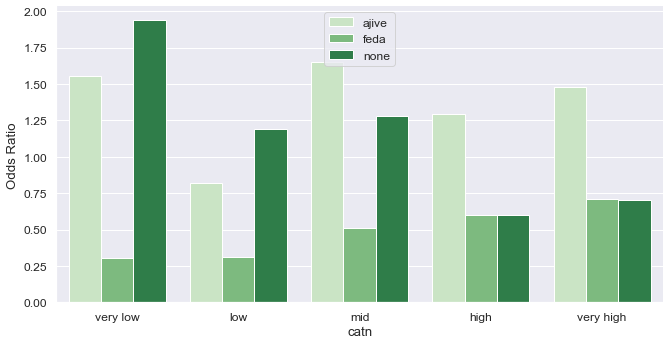

In [14]:
sns.set(font_scale=1.1)
#hue = ['DecisionTreeRegressor', 'mutual_info_regression', 'ElasticNet', 'f_regression', 'Lasso', 'RandomForestRegressor', ]
g = sns.catplot(x = 'catn', y='OR', hue='da',order=order,data=top_OR(knn, ['da', 'catn'], score='r2').reset_index(), kind='bar', palette='Greens', height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set_ylabels('Odds Ratio')
plt.legend(loc='upper center')
plt.tight_layout()
#plt.savefig('graphs/adjusted-top-n.eps', format='eps')

## Random Forest

In [15]:
rf = clean[clean['model']=='RandomForestRegressor'][['Drug', 'fs', 'da', 'catn', 'n_estimators', 'max_depth', 'max_features','r2_score', 'r2']]

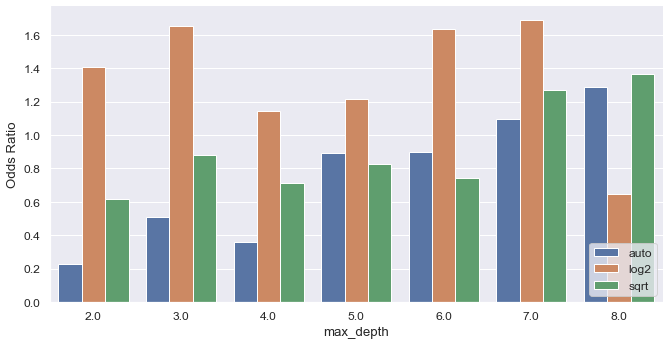

In [16]:
sns.set(font_scale=1.1)
#hue = ['DecisionTreeRegressor', 'mutual_info_regression', 'ElasticNet', 'f_regression', 'Lasso', 'RandomForestRegressor', ]
g = sns.catplot(x = 'max_depth', y='OR', hue='max_features',data=top_OR(rf, ['max_depth', 'max_features'], score='r2').reset_index(), kind='bar', height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set_ylabels('Odds Ratio')
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('graphs/adjusted-top-n.eps', format='eps')

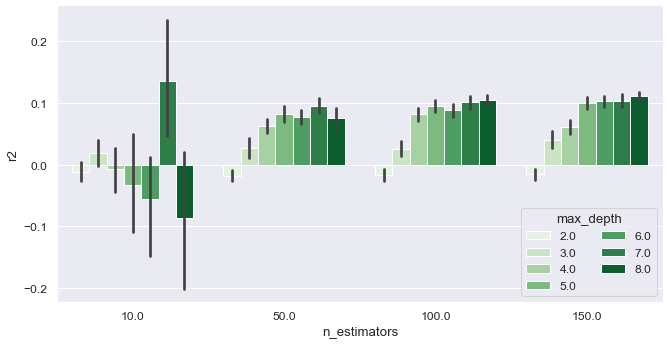

In [17]:
sns.set(font_scale=1.1)

g = sns.catplot(x='n_estimators', y='r2', hue='max_depth', data=rf, kind='bar',palette='Greens',height=5, aspect=1.9, legend=False)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
plt.legend(title='max_depth',ncol=2)
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-depth.eps', format='eps')

No handles with labels found to put in legend.


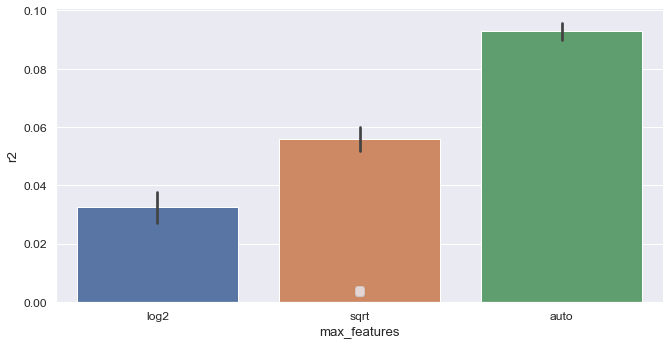

In [18]:
sns.set(font_scale=1.1)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='max_features', y='r2', data=rf, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-depth.eps', format='eps')

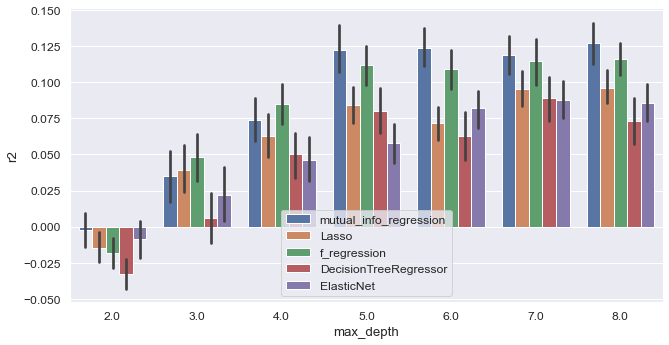

In [19]:
sns.set(font_scale=1.1)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='max_depth', y='r2', hue='fs', data=rf, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

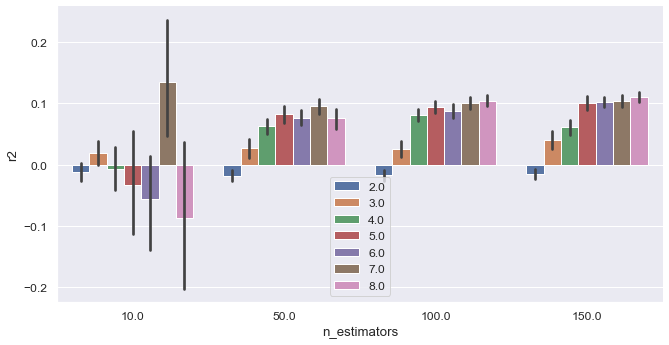

In [20]:
sns.set(font_scale=1.1)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='n_estimators', y='r2', hue='max_depth', data=rf, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

## Elastic Net

In [21]:
en = clean[clean['model']=='ElasticNet'][['Drug', 'fs', 'da', 'catn', 'alpha', 'l1_ratio','r2_score', 'r2']]

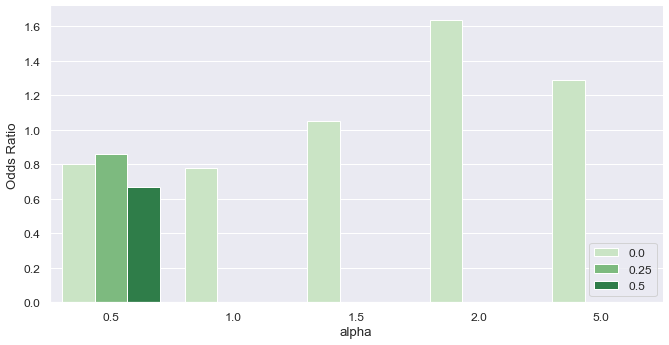

In [22]:
sns.set(font_scale=1.1)
#hue = ['DecisionTreeRegressor', 'mutual_info_regression', 'ElasticNet', 'f_regression', 'Lasso', 'RandomForestRegressor', ]
g = sns.catplot(x = 'alpha', y='OR', hue='l1_ratio',data=top_OR(en, ['l1_ratio', 'alpha'], score='r2').reset_index(), kind='bar', palette='Greens', height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set_ylabels('Odds Ratio')
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('graphs/adjusted-top-n.eps', format='eps')

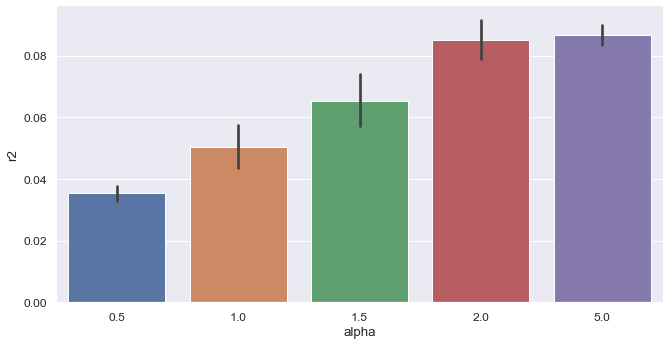

In [23]:
sns.set(font_scale=1.1)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='alpha', y='r2', data=en, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

#plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')